## Modelo Preditivo

In [1]:
specific_columns = ['PESSOA_PIPEDRIVE_has_notes', 'ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente', 'WHOQOL_Físico_New', 'WHOQOL_Psicológico_New', 'WHOQOL_Social_New', 'COMUNICARE_Problemas Abertos Bool', 'TWILIO_Data Última Mensagens Inbound Recente', 'stay_time', 'last_stage_concluded', 'process_time', 'TWILIO_Data Última Mensagens Outbound Recente', 'TWILIO_Data Última Ligações Outbound Recente']

PENDENTE: FEATURE ENGINEERING

PESSOA_PIPEDRIVE_has_notes até TWILIO_Data Última Ligações Outbound Recente

In [2]:
import pandas as pd

data = pd.read_csv("../scripts/data-preprocessed.csv")
data = data[specific_columns]  # Manter apenas as colunas específicas

In [3]:

import numpy as np

# Tratar valores ausentes
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == np.number:
            data[column].fillna(data[column].median(), inplace=True)
        else:
            data[column].fillna(data[column].mode()[0], inplace=True)


In [4]:
data.shape[1]

12

In [5]:
import missingno as msno

<AxesSubplot:>

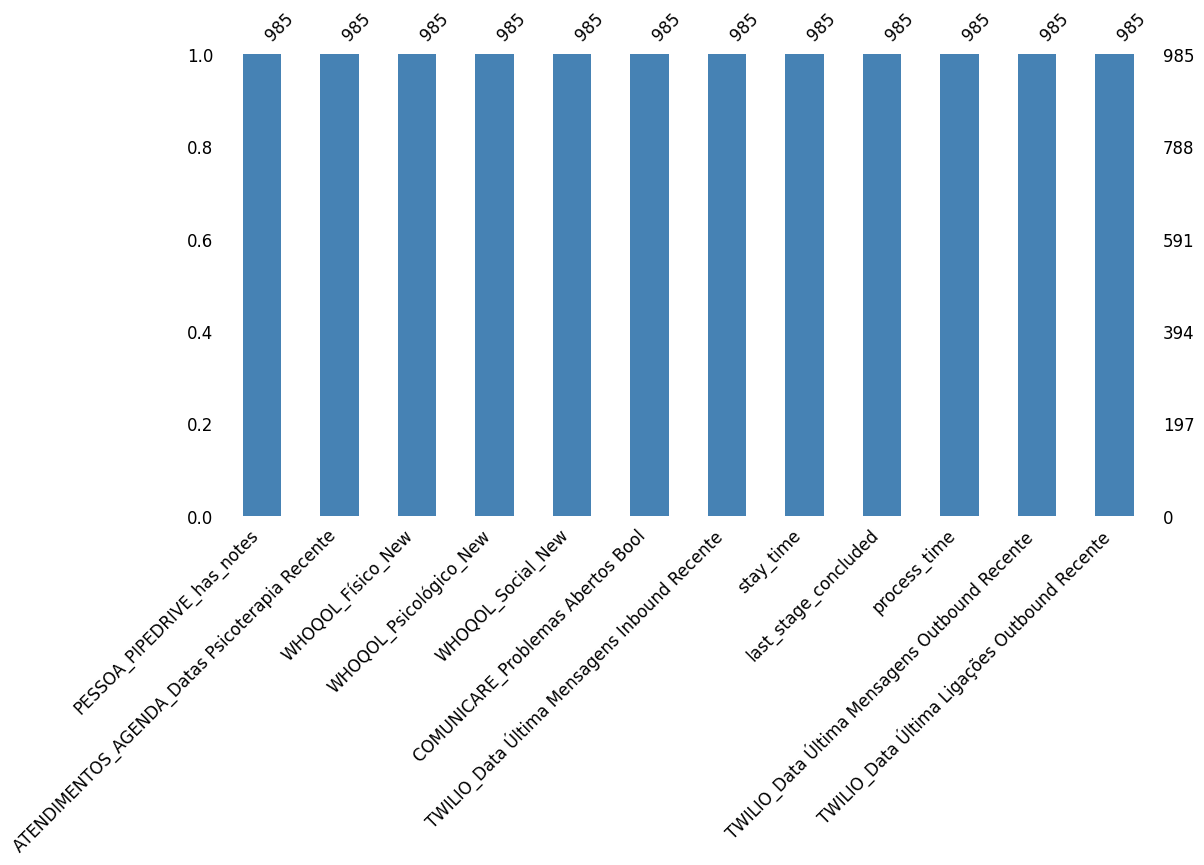

In [6]:
msno.bar(data.iloc[:, :], figsize=(12, 6), fontsize=12, color='steelblue')

## Featuere Engineering

### PESSOA_PIPEDRIVE_has_notes

- PESSOA_PIPEDRIVE_has_notes: 0 ou 1

In [7]:
data['PESSOA_PIPEDRIVE_has_notes'].value_counts()

1    565
0    420
Name: PESSOA_PIPEDRIVE_has_notes, dtype: int64

Feature Engineering: Como é uma variável binária (0 ou 1), verificar a distribuição dos valores para entender a proporcionalidade. Se houver um desequilíbrio significativo, pode-se considerar técnicas de reamostragem ou ponderação para balancear a influência dessa feature no modelo.

In [8]:
from sklearn.utils import resample


# Verificando a distribuição da variável 'PESSOA_PIPEDRIVE_has_notes'
distribution = data['PESSOA_PIPEDRIVE_has_notes'].value_counts(normalize=True)
print("Distribuição original:")
print(distribution)

# Código para reamostragem ou ponderação, se necessário
# Checando se há desequilíbrio significativo
if distribution.min() < 0.4:  # Supondo um limite de 40% para considerar desequilíbrio
    # Separando as classes
    class_0 = data[data['PESSOA_PIPEDRIVE_has_notes'] == 0]
    class_1 = data[data['PESSOA_PIPEDRIVE_has_notes'] == 1]

    # Reamostrando a classe minoritária
    class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=123)
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['PESSOA_PIPEDRIVE_has_notes'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")


Distribuição original:
1    0.573604
0    0.426396
Name: PESSOA_PIPEDRIVE_has_notes, dtype: float64

Não é necessário balanceamento.


### ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente

- ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente:


In [9]:
data['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente']

0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente, Length: 985, dtype: bool

In [10]:
data['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente'].value_counts()

False    790
True     195
Name: ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente, dtype: int64

Feature Engineering: Se essa feature representa datas, pode-se converter para um formato numérico, como o número de dias desde uma data de referência. Também seria útil criar features derivadas, como mês, dia da semana, ou intervalos desde a última sessão.

In [11]:

# Análise da Distribuição
distribution = data['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente'].value_counts(normalize=True)
print("Distribuição dos valores booleanos:")
print(distribution)

# Conversão para Valores Numéricos
data['ATENDIMENTOS_AGENDA_Boolean_Numeric'] = data['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente'].astype(int)

# Verificando os primeiros registros após a conversão
print("\nDados após a conversão para numérico:")
print(data[['ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente', 'ATENDIMENTOS_AGENDA_Boolean_Numeric']].head())

# Se você tiver outra coluna para criar features derivadas, adicione o código aqui


Distribuição dos valores booleanos:
False    0.80203
True     0.19797
Name: ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente, dtype: float64

Dados após a conversão para numérico:
   ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   ATENDIMENTOS_AGENDA_Boolean_Numeric  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  


In [12]:
# Verificando a distribuição da variável convertida
distribution = data['ATENDIMENTOS_AGENDA_Boolean_Numeric'].value_counts(normalize=True)
print("Distribuição após conversão para numérico:")
print(distribution)

# Reamostragem para equilibrar as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['ATENDIMENTOS_AGENDA_Boolean_Numeric'] == 0]
class_1 = data[data['ATENDIMENTOS_AGENDA_Boolean_Numeric'] == 1]

# Checando se o balanceamento é necessário
if distribution.min() < 0.4:  # Supondo um limite de 40% para desequilíbrio
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['ATENDIMENTOS_AGENDA_Boolean_Numeric'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")




Distribuição após conversão para numérico:
0    0.80203
1    0.19797
Name: ATENDIMENTOS_AGENDA_Boolean_Numeric, dtype: float64

Distribuição após reamostragem:
0    0.5
1    0.5
Name: ATENDIMENTOS_AGENDA_Boolean_Numeric, dtype: float64


### WHOQOL_Fisico_New

- WHOQOL_Fisico_New: 

In [13]:
# Verificando a natureza da variável WHOQOL_Fisico_New
print(data['WHOQOL_Físico_New'].head())

0    4.0
1    3.7
2    3.0
3    2.0
4    3.9
Name: WHOQOL_Físico_New, dtype: float64


In [14]:
data['WHOQOL_Físico_New']

0      4.0
1      3.7
2      3.0
3      2.0
4      3.9
      ... 
980    3.7
981    2.9
982    3.7
983    3.7
984    3.7
Name: WHOQOL_Físico_New, Length: 985, dtype: float64

In [15]:
data['WHOQOL_Físico_New'].value_counts()

3.7    296
3.9     63
4.1     63
3.6     59
4.0     56
4.3     54
3.3     54
3.4     51
3.0     45
3.1     38
2.9     32
4.6     30
4.4     27
2.7     26
4.7     24
4.9     13
2.3     13
2.6      9
5.0      8
2.0      6
2.4      6
2.1      4
1.6      3
1.7      3
1.4      1
1.3      1
Name: WHOQOL_Físico_New, dtype: int64

Feature Engineering: A natureza desta feature não está clara. Se for uma variável categórica, a codificação one-hot ou ordinal pode ser aplicada. Se for numérica, verificar a distribuição e aplicar normalização ou padronização, se necessário.

In [16]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Verificando a natureza da variável WHOQOL_Fisico_New
print(data['WHOQOL_Físico_New'].head())

# Verificando se é categórica ou numérica
if data['WHOQOL_Físico_New'].dtype == 'object':
    # Aplicando codificação one-hot para variáveis categóricas
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(data[['WHOQOL_Físico_New']])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['WHOQOL_Físico_New']))
    data = data.join(encoded_df)
else:
    # Aplicando normalização ou padronização para variáveis numéricas
    scaler = StandardScaler()
    data['WHOQOL_Físico_New'] = scaler.fit_transform(data[['WHOQOL_Físico_New']])

# Exibindo as primeiras linhas do dataset após o tratamento
print(data['WHOQOL_Físico_New'].head())


0    4.0
1    3.7
2    3.0
3    2.0
4    3.9
Name: WHOQOL_Físico_New, dtype: float64
0    0.575026
1    0.061362
2   -1.137189
3   -2.849403
4    0.403805
Name: WHOQOL_Físico_New, dtype: float64


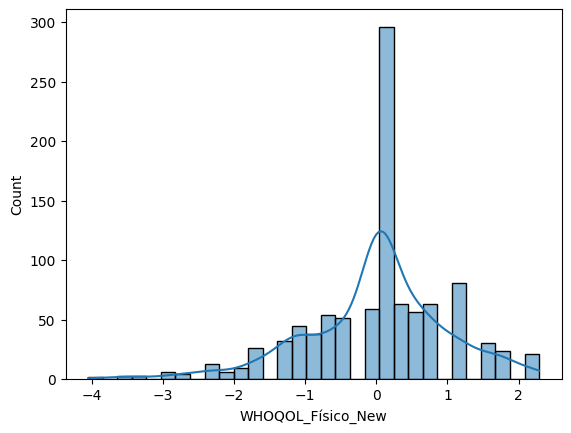

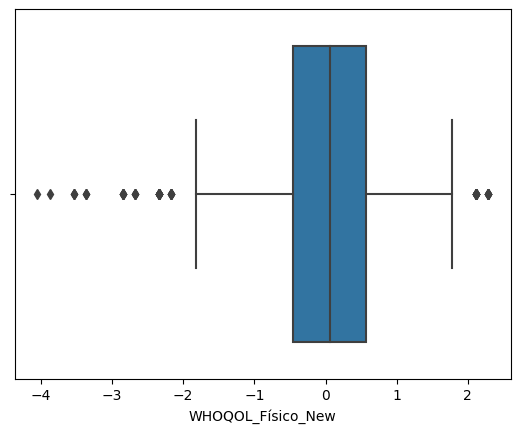

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

# Analisando a distribuição da variável
sns.histplot(data['WHOQOL_Físico_New'], kde=True)
plt.show()

# Verificando a presença de outliers
sns.boxplot(x=data['WHOQOL_Físico_New'])
plt.show()


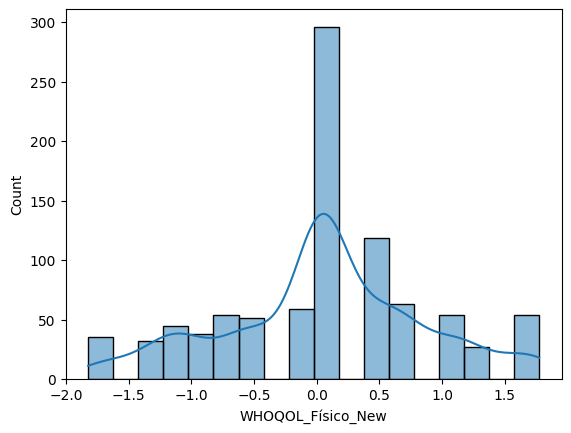

In [18]:
# Verificar outliers

# Calculando o intervalo interquartil
Q1 = data['WHOQOL_Físico_New'].quantile(0.25)
Q3 = data['WHOQOL_Físico_New'].quantile(0.75)
IQR = Q3 - Q1

# Removendo os outliers
data = data[(data['WHOQOL_Físico_New'] >= Q1 - 1.5 * IQR) & (data['WHOQOL_Físico_New'] <= Q3 + 1.5 * IQR)]

# Verificando a distribuição após a remoção dos outliers
sns.histplot(data['WHOQOL_Físico_New'], kde=True)
plt.show()

### WHOQOL_Psicológico_New

- WHOQOL_Psicológico_New:

In [19]:
data['WHOQOL_Psicológico_New']

0      4.0
1      3.2
2      3.0
4      3.8
5      3.5
      ... 
980    3.5
981    2.0
982    3.5
983    4.0
984    3.5
Name: WHOQOL_Psicológico_New, Length: 927, dtype: float64

In [20]:
data['WHOQOL_Psicológico_New'].value_counts()

3.5    252
4.0    250
3.0    207
2.0     39
5.0     31
3.8     21
3.7     20
3.3     18
3.2     14
2.8     12
4.5      9
2.3      9
4.2      9
2.5      8
2.7      8
4.3      8
2.2      4
1.5      3
1.8      2
1.7      1
1.0      1
4.7      1
Name: WHOQOL_Psicológico_New, dtype: int64

Feature Engineering: Semelhante ao WHOQOL_Fisico_New, a abordagem depende do tipo de dado. Para dados categóricos, aplicar codificação adequada; para dados numéricos, considerar normalização e detecção de outliers.

0    4.0
1    3.2
2    3.0
4    3.8
5    3.5
Name: WHOQOL_Psicológico_New, dtype: float64


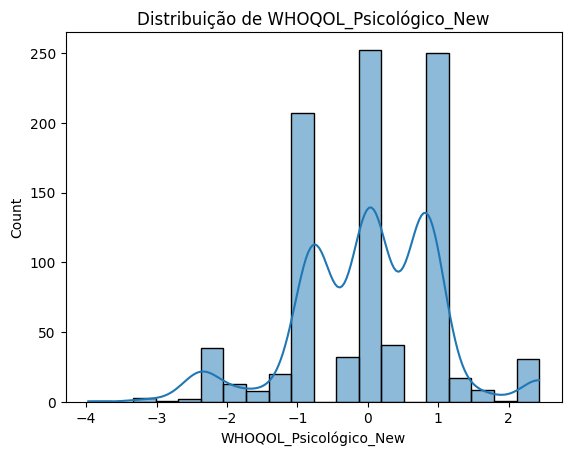

Índices de outliers: (array([202, 296, 498, 515]),)


In [21]:
# Verificando a natureza da variável WHOQOL_Psicológico_New
from scipy import stats


print(data['WHOQOL_Psicológico_New'].head())

# Verificando se é categórica ou numérica
if data['WHOQOL_Psicológico_New'].dtype == 'object':
    # Aplicando codificação one-hot para variáveis categóricas
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(data[['WHOQOL_Psicológico_New']])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['WHOQOL_Psicológico_New']))
    data = data.join(encoded_df)
else:
    # Aplicando normalização ou padronização para variáveis numéricas
    scaler = StandardScaler()
    data['WHOQOL_Psicológico_New'] = scaler.fit_transform(data[['WHOQOL_Psicológico_New']])

    # Análise de distribuição e detecção de outliers
    sns.histplot(data['WHOQOL_Psicológico_New'], bins=20, kde=True)
    plt.title('Distribuição de WHOQOL_Psicológico_New')
    plt.show()

    # Detecção de outliers
    z_scores = np.abs(stats.zscore(data['WHOQOL_Psicológico_New']))
    outliers = np.where(z_scores > 3)  # Limiar de 3 para outliers
    print(f"Índices de outliers: {outliers}")


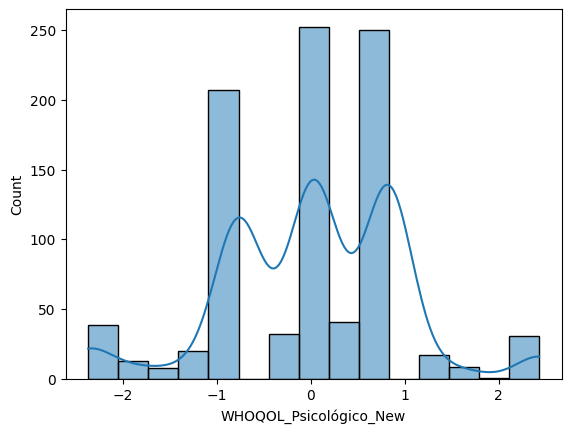

In [22]:
# Verificar outliers

# Calculando o intervalo interquartil
Q1 = data['WHOQOL_Psicológico_New'].quantile(0.25)
Q3 = data['WHOQOL_Psicológico_New'].quantile(0.75)
IQR = Q3 - Q1

# Removendo os outliers
data = data[(data['WHOQOL_Psicológico_New'] >= Q1 - 1 * IQR) & (data['WHOQOL_Psicológico_New'] <= Q3 + 1 * IQR)]

# Verificando a distribuição após a remoção dos outliers
sns.histplot(data['WHOQOL_Psicológico_New'], kde=True)
plt.show()


### WHOQOL_Social_New

- WHOQOL_Social_New:

In [23]:
data['WHOQOL_Social_New']

0      4.0
1      2.7
2      4.0
4      4.3
5      4.0
      ... 
980    4.0
981    3.0
982    4.0
983    4.0
984    4.0
Name: WHOQOL_Social_New, Length: 920, dtype: float64

In [24]:
data['WHOQOL_Social_New'].value_counts()

4.0    503
3.0    197
5.0     71
2.0     32
3.7     29
3.3     24
4.3     17
4.7     16
2.7     14
2.3     10
1.7      3
1.3      3
1.0      1
Name: WHOQOL_Social_New, dtype: int64

Feature Engineering: Assumindo uma natureza semelhante às outras variáveis WHOQOL, aplicar as mesmas técnicas conforme apropriado ao tipo de dados (categórico ou numérico).

0    4.0
1    2.7
2    4.0
4    4.3
5    4.0
Name: WHOQOL_Social_New, dtype: float64


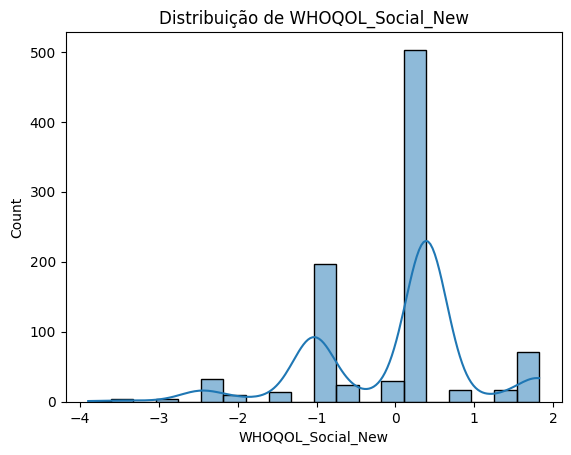

Índices de outliers: (array([244, 371, 508, 759]),)


In [25]:
from scipy import stats
import numpy as np


# Verificando a natureza da variável WHOQOL_Social_New
print(data['WHOQOL_Social_New'].head())

# Verificando se é categórica ou numérica
if data['WHOQOL_Social_New'].dtype == 'object':
    # Aplicando codificação one-hot para variáveis categóricas
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(data[['WHOQOL_Social_New']])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['WHOQOL_Social_New']))
    data = data.join(encoded_df)
else:
    # Aplicando normalização ou padronização para variáveis numéricas
    scaler = StandardScaler()
    data['WHOQOL_Social_New'] = scaler.fit_transform(data[['WHOQOL_Social_New']])

    # Análise de distribuição e detecção de outliers
    sns.histplot(data['WHOQOL_Social_New'], bins=20,kde=True)
    plt.title('Distribuição de WHOQOL_Social_New')
    plt.show()

    # Detecção de outliers
    z_scores = np.abs(stats.zscore(data['WHOQOL_Social_New']))
    outliers = np.where(z_scores > 3)  # Limiar de 3 para outliers
    print(f"Índices de outliers: {outliers}")


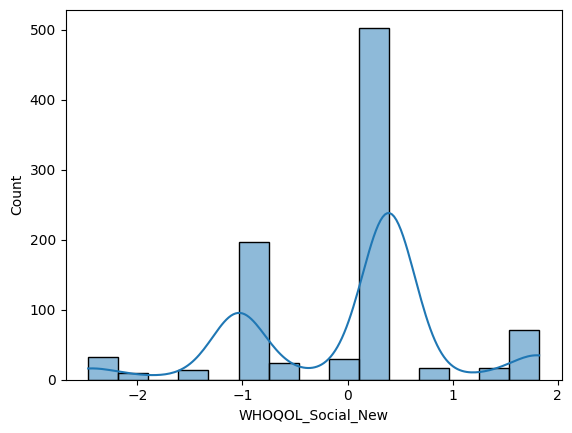

In [26]:
# Verificar outliers

# Calculando o intervalo interquartil
Q1 = data['WHOQOL_Social_New'].quantile(0.25)
Q3 = data['WHOQOL_Social_New'].quantile(0.75)
IQR = Q3 - Q1

# Removendo os outliers
data = data[(data['WHOQOL_Social_New'] >= Q1 - 1 * IQR) & (data['WHOQOL_Social_New'] <= Q3 + 1 * IQR)]

# Verificando a distribuição após a remoção dos outliers
sns.histplot(data['WHOQOL_Social_New'], kde=True)
plt.show()


### COMUNICARE_Problemas Abertos Bool
- COMUNICARE_Problemas Abertos Bool

In [27]:
data['COMUNICARE_Problemas Abertos Bool']

0      0
1      1
2      1
4      1
5      0
      ..
980    0
981    1
982    0
983    0
984    0
Name: COMUNICARE_Problemas Abertos Bool, Length: 913, dtype: int64

In [28]:
data['COMUNICARE_Problemas Abertos Bool'].value_counts()

1    466
0    447
Name: COMUNICARE_Problemas Abertos Bool, dtype: int64

Feature Engineering: Como é uma variável binária, similar à feature PESSOA_PIPEDRIVE_has_notes, verificar a distribuição dos valores e aplicar técnicas de balanceamento se necessário.

In [29]:
from sklearn.utils import resample

# Verificando a distribuição dos valores
distribution = data['COMUNICARE_Problemas Abertos Bool'].value_counts(normalize=True)
print("Distribuição dos valores:")
print(distribution)

# Reamostragem para balancear as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['COMUNICARE_Problemas Abertos Bool'] == False]
class_1 = data[data['COMUNICARE_Problemas Abertos Bool'] == True]

# Checando se o balanceamento é necessário (por exemplo, limiar de 40%)
if distribution.min() < 0.4:
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['COMUNICARE_Problemas Abertos Bool'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")

Distribuição dos valores:
1    0.510405
0    0.489595
Name: COMUNICARE_Problemas Abertos Bool, dtype: float64

Não é necessário balanceamento.


### TWILIO_Data Última Mensagens Inbound Recente

- TWILIO_Data Última Mensagens Inbound Recente

In [30]:
data['TWILIO_Data Última Mensagens Inbound Recente']

0      False
1       True
2       True
4       True
5      False
       ...  
980    False
981    False
982    False
983    False
984    False
Name: TWILIO_Data Última Mensagens Inbound Recente, Length: 913, dtype: bool

In [31]:
data['TWILIO_Data Última Mensagens Inbound Recente'].value_counts()

False    475
True     438
Name: TWILIO_Data Última Mensagens Inbound Recente, dtype: int64

Feature Engineering: Converter datas para um formato numérico, como o número de dias desde uma data de referência. Pode-se criar features derivadas como dia da semana, mês, e talvez tempo desde a última mensagem.

In [32]:

# Análise da Distribuição
distribution = data['TWILIO_Data Última Mensagens Inbound Recente'].value_counts(normalize=True)
print("Distribuição dos valores booleanos:")
print(distribution)

# Conversão para Valores Numéricos
data['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'] = data['TWILIO_Data Última Mensagens Inbound Recente'].astype(int)

# Verificando os primeiros registros após a conversão
print("\nDados após a conversão para numérico:")
print(data[['TWILIO_Data Última Mensagens Inbound Recente', 'TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric']].head())

# Se você tiver outra coluna para criar features derivadas, adicione o código aqui


Distribuição dos valores booleanos:
False    0.520263
True     0.479737
Name: TWILIO_Data Última Mensagens Inbound Recente, dtype: float64

Dados após a conversão para numérico:
   TWILIO_Data Última Mensagens Inbound Recente  \
0                                         False   
1                                          True   
2                                          True   
4                                          True   
5                                         False   

   TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric  
0                                                  0             
1                                                  1             
2                                                  1             
4                                                  1             
5                                                  0             


In [33]:
# Verificando a distribuição da variável convertida
distribution = data['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'].value_counts(normalize=True)
print("Distribuição após conversão para numérico:")
print(distribution)

# Reamostragem para equilibrar as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'] == 0]
class_1 = data[data['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'] == 1]

# Checando se o balanceamento é necessário
if distribution.min() < 0.4:  # Supondo um limite de 40% para desequilíbrio
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")




Distribuição após conversão para numérico:
0    0.520263
1    0.479737
Name: TWILIO_Data Última Mensagens Inbound Recente_Boolean_Numeric, dtype: float64

Não é necessário balanceamento.


### stay_time

- Stay_time:

In [34]:
data['stay_time']

0       211 days
1       829 days
2       456 days
4       840 days
5       224 days
         ...    
980    Em aberto
981    Em aberto
982    Em aberto
983    Em aberto
984    Em aberto
Name: stay_time, Length: 913, dtype: object

In [35]:
data['stay_time'].value_counts()

Em aberto    507
91 days       13
152 days      12
90 days       11
274 days      11
            ... 
484 days       1
65 days        1
33 days        1
422 days       1
34 days        1
Name: stay_time, Length: 178, dtype: int64

Feature Engineering: Se esta feature representa a duração, verificar a sua distribuição e aplicar transformações, como log-transform, se houver uma distribuição muito enviesada. Normalização ou padronização também podem ser úteis.

### last_stage_concluded

- last_stage_concluded:

In [36]:
data['last_stage_concluded']

0          Questionário
1          Questionário
2          Questionário
4          Questionário
5          Questionário
             ...       
980         Boas-vindas
981    Primeira reunião
982         Boas-vindas
983         Boas-vindas
984         Boas-vindas
Name: last_stage_concluded, Length: 913, dtype: object

In [37]:
data['last_stage_concluded'].value_counts()

Questionário        659
Boas-vindas         167
Primeira reunião     51
Não iniciado         36
Name: last_stage_concluded, dtype: int64

Feature Engineering: Se for uma variável categórica indicando diferentes estágios, a codificação one-hot ou ordinal pode ser aplicada. Se for uma variável temporal, seguir uma abordagem semelhante à da feature TWILIO_Data.

In [38]:

# Aplicando codificação one-hot
data_encoded = pd.get_dummies(data['last_stage_concluded'], columns=['last_stage_concluded'], prefix='stage')
print(data_encoded)


     stage_Boas-vindas  stage_Não iniciado  stage_Primeira reunião  \
0                    0                   0                       0   
1                    0                   0                       0   
2                    0                   0                       0   
4                    0                   0                       0   
5                    0                   0                       0   
..                 ...                 ...                     ...   
980                  1                   0                       0   
981                  0                   0                       1   
982                  1                   0                       0   
983                  1                   0                       0   
984                  1                   0                       0   

     stage_Questionário  
0                     1  
1                     1  
2                     1  
4                     1  
5                     1  
.. 

### process_time

- process_time:

In [39]:
data['process_time']

0      2022-04-19 15:19:40
1      2022-04-28 03:00:00
2      2022-06-27 15:03:30
4      2022-05-05 13:14:01
5      2022-02-07 03:00:00
              ...         
980              Em aberto
981              Em aberto
982              Em aberto
983              Em aberto
984              Em aberto
Name: process_time, Length: 913, dtype: object

In [40]:
data['process_time'].value_counts()

Em aberto              95
Não iniciado           36
2023-09-04 00:00:00    15
2023-04-25 11:53:56     4
2023-04-25 11:53:57     4
                       ..
2022-06-06 22:47:29     1
2022-07-21 19:33:32     1
2022-06-09 17:39:29     1
2022-08-30 13:40:12     1
2023-11-08 11:46:50     1
Name: process_time, Length: 728, dtype: int64

Feature Engineering: Similar à feature stay_time, aplicar transformações apropriadas com base na distribuição dos dados. Se for uma medida de tempo, verificar se há outliers e lidar com eles adequadamente.

In [41]:
# Convertendo a coluna 'process_time' para datetime e tratando valores inválidos
data['process_time'] = pd.to_datetime(data['process_time'], errors='coerce')

# Defina a data de referência adequada (substitua 'data_de_referencia' pela data real)
data_de_referencia = pd.to_datetime('2022-01-01')

# Calculando o tempo decorrido em dias desde a data de referência
data['days_since_reference_date'] = (data['process_time'] - data_de_referencia).dt.days

print(data[['process_time', 'days_since_reference_date']])


           process_time  days_since_reference_date
0   2022-04-19 15:19:40                      108.0
1   2022-04-28 03:00:00                      117.0
2   2022-06-27 15:03:30                      177.0
4   2022-05-05 13:14:01                      124.0
5   2022-02-07 03:00:00                       37.0
..                  ...                        ...
980                 NaT                        NaN
981                 NaT                        NaN
982                 NaT                        NaN
983                 NaT                        NaN
984                 NaT                        NaN

[913 rows x 2 columns]


In [42]:
# Preencher com um Valor Padrão: Você pode preencher os valores NaT com um valor padrão, como -1, para indicar que essas entradas não têm data válida.

#data['days_since_reference_date'].fillna(-1, inplace=True)


In [43]:
#Remover Linhas com Valores NaT: Se essas entradas não forem relevantes para sua análise, você pode optar por remover as linhas com valores NaT.

data.dropna(subset=['days_since_reference_date'], inplace=True)


In [44]:
print(data[['process_time', 'days_since_reference_date']])

           process_time  days_since_reference_date
0   2022-04-19 15:19:40                      108.0
1   2022-04-28 03:00:00                      117.0
2   2022-06-27 15:03:30                      177.0
4   2022-05-05 13:14:01                      124.0
5   2022-02-07 03:00:00                       37.0
..                  ...                        ...
962 2023-10-31 19:42:24                      668.0
965 2023-10-31 12:40:43                      668.0
967 2023-11-06 19:50:59                      674.0
969 2023-11-01 11:34:05                      669.0
971 2023-11-08 11:46:50                      676.0

[782 rows x 2 columns]


### TWILIO_Data Última Mensagens Outbound Recente

- TWILIO_Data Última Mensagens Outbound Recente

In [45]:
data['TWILIO_Data Última Mensagens Outbound Recente']

0       True
1      False
2       True
4       True
5      False
       ...  
962     True
965     True
967     True
969     True
971     True
Name: TWILIO_Data Última Mensagens Outbound Recente, Length: 782, dtype: bool

In [46]:
data['TWILIO_Data Última Mensagens Outbound Recente'].value_counts()

False    398
True     384
Name: TWILIO_Data Última Mensagens Outbound Recente, dtype: int64

Feature Engineering: Similar à feature de mensagens inbound, esta também deve ser convertida para um formato numérico, como o número de dias desde uma data de referência. Seria útil também criar features derivadas, como dia da semana, mês, e talvez o intervalo de tempo desde a última mensagem outbound.


In [47]:

# Análise da Distribuição
distribution = data['TWILIO_Data Última Mensagens Outbound Recente'].value_counts(normalize=True)
print("Distribuição dos valores booleanos:")
print(distribution)

# Conversão para Valores Numéricos
data['TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric'] = data['TWILIO_Data Última Mensagens Outbound Recente'].astype(int)

# Verificando os primeiros registros após a conversão
print("\nDados após a conversão para numérico:")
print(data[['TWILIO_Data Última Mensagens Outbound Recente', 'TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric']].head())

# Se você tiver outra coluna para criar features derivadas, adicione o código aqui


Distribuição dos valores booleanos:
False    0.508951
True     0.491049
Name: TWILIO_Data Última Mensagens Outbound Recente, dtype: float64

Dados após a conversão para numérico:
   TWILIO_Data Última Mensagens Outbound Recente  \
0                                           True   
1                                          False   
2                                           True   
4                                           True   
5                                          False   

   TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric  
0                                                  1              
1                                                  0              
2                                                  1              
4                                                  1              
5                                                  0              


In [48]:
# Verificando a distribuição da variável convertida
distribution = data['TWILIO_Data Última Mensagens Outbound Recente'].value_counts(normalize=True)
print("Distribuição após conversão para numérico:")
print(distribution)

# Reamostragem para equilibrar as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric'] == 0]
class_1 = data[data['TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric'] == 1]

# Checando se o balanceamento é necessário
if distribution.min() < 0.4:  # Supondo um limite de 40% para desequilíbrio
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['TWILIO_Data Última Mensagens Outbound Recente_Boolean_Numeric'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")




Distribuição após conversão para numérico:
False    0.508951
True     0.491049
Name: TWILIO_Data Última Mensagens Outbound Recente, dtype: float64

Não é necessário balanceamento.


### TWILIO_Data Última Ligações Outbound Recente

- TWILIO_Data Última Ligações Outbound Recente

In [49]:
data['TWILIO_Data Última Ligações Outbound Recente']

0       True
1      False
2      False
4      False
5      False
       ...  
962    False
965    False
967    False
969    False
971    False
Name: TWILIO_Data Última Ligações Outbound Recente, Length: 782, dtype: bool

In [50]:
data['TWILIO_Data Última Ligações Outbound Recente'].value_counts()

False    600
True     182
Name: TWILIO_Data Última Ligações Outbound Recente, dtype: int64

Feature Engineering: Assim como as outras features relacionadas a datas, converter para um formato numérico que represente a temporalidade da feature, como dias desde uma data de referência. Pode-se também criar features derivadas que capturem aspectos temporais específicos, como hora do dia, dia da semana, ou tempo desde a última ligação outbound.

In [51]:

# Análise da Distribuição
distribution = data['TWILIO_Data Última Ligações Outbound Recente'].value_counts(normalize=True)
print("Distribuição dos valores booleanos:")
print(distribution)

# Conversão para Valores Numéricos
data['TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric'] = data['TWILIO_Data Última Ligações Outbound Recente'].astype(int)

# Verificando os primeiros registros após a conversão
print("\nDados após a conversão para numérico:")
print(data[['TWILIO_Data Última Ligações Outbound Recente', 'TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric']].head())

# Se você tiver outra coluna para criar features derivadas, adicione o código aqui


Distribuição dos valores booleanos:
False    0.767263
True     0.232737
Name: TWILIO_Data Última Ligações Outbound Recente, dtype: float64

Dados após a conversão para numérico:
   TWILIO_Data Última Ligações Outbound Recente  \
0                                          True   
1                                         False   
2                                         False   
4                                         False   
5                                         False   

   TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric  
0                                                  1             
1                                                  0             
2                                                  0             
4                                                  0             
5                                                  0             


In [52]:
# Verificando a distribuição da variável convertida
distribution = data['TWILIO_Data Última Ligações Outbound Recente'].value_counts(normalize=True)
print("Distribuição após conversão para numérico:")
print(distribution)

# Reamostragem para equilibrar as classes (se necessário)
# Este exemplo aumenta a classe minoritária (True/1)
class_0 = data[data['TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric'] == 0]
class_1 = data[data['TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric'] == 1]

# Checando se o balanceamento é necessário
if distribution.min() < 0.4:  # Supondo um limite de 40% para desequilíbrio
    class_1_upsampled = resample(class_1,
                                 replace=True,     # amostra com substituição
                                 n_samples=len(class_0),    # para igualar com a classe majoritária
                                 random_state=123) # seed para reprodutibilidade

    # Combinando a classe majoritária com a classe minoritária reamostrada
    data_balanced = pd.concat([class_0, class_1_upsampled])

    # Verificando a nova distribuição
    new_distribution = data_balanced['TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric'].value_counts(normalize=True)
    print("\nDistribuição após reamostragem:")
    print(new_distribution)
else:
    print("\nNão é necessário balanceamento.")




Distribuição após conversão para numérico:
False    0.767263
True     0.232737
Name: TWILIO_Data Última Ligações Outbound Recente, dtype: float64

Distribuição após reamostragem:
0    0.5
1    0.5
Name: TWILIO_Data Última Ligações Outbound Recente_Boolean_Numeric, dtype: float64


### GRAFICO DE CORRELAÇÃO

/var/folders/cd/1cl217ws7w7fdp_b1kp0j_lh0000gn/T/ipykernel_75307/716233708.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


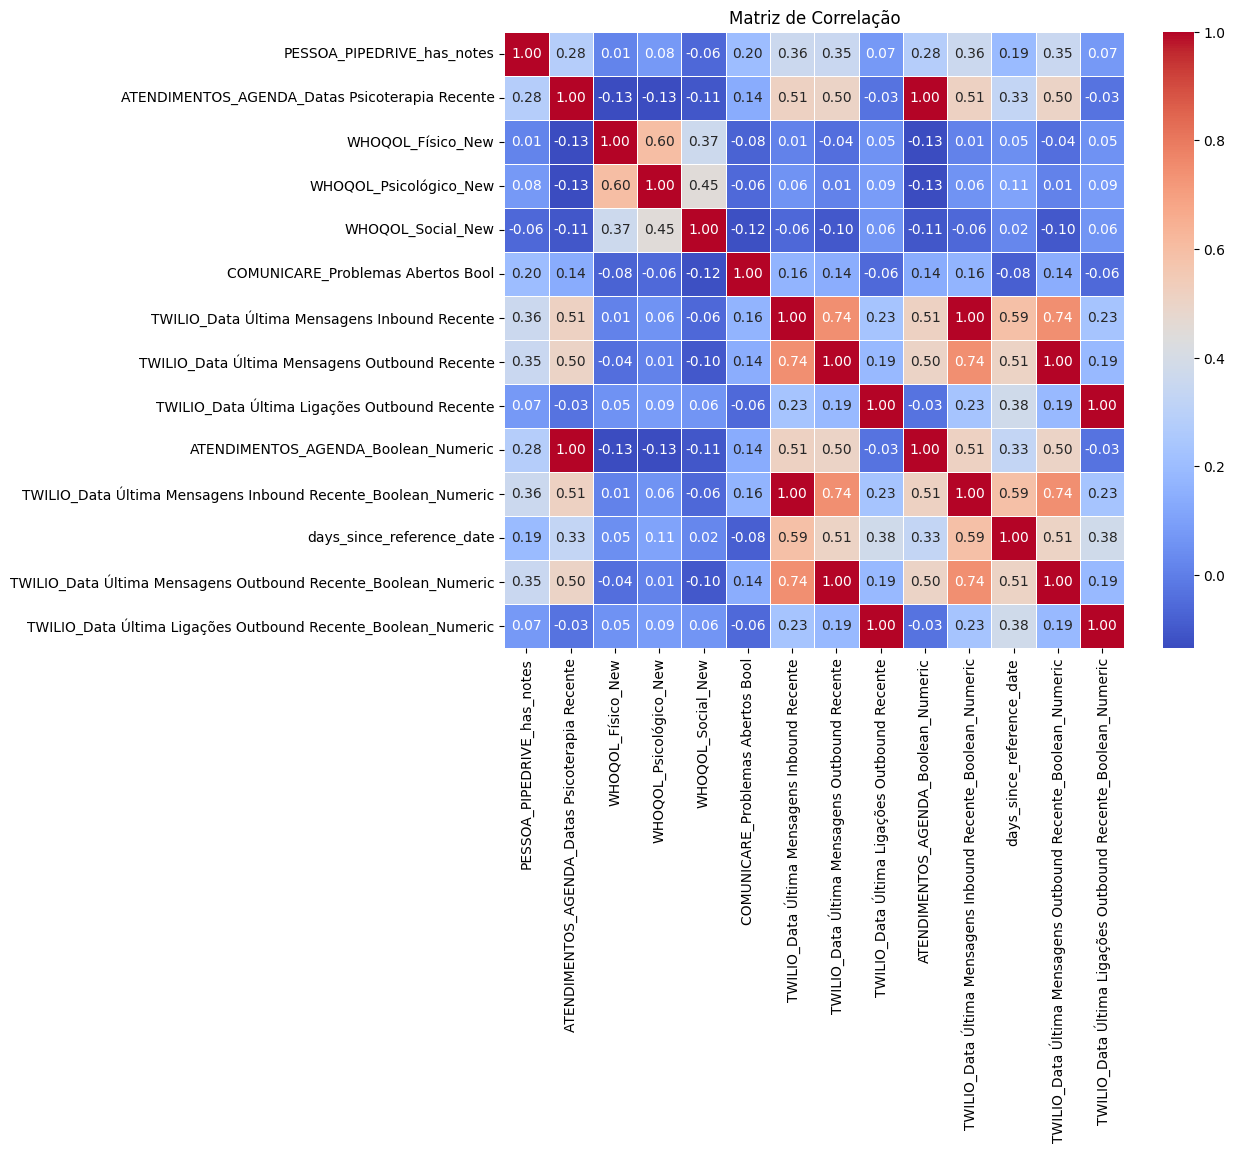

In [53]:

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()
